In [18]:
import math
import pickle
import gzip
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

# importing all the required libraries

from math import exp
import numpy as np
import pandas as pd
import sklearn
import statistics
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
%matplotlib inline
import seaborn as sns
from sklearn.cluster import AgglomerativeClustering, KMeans
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
from mca import MCA

In [23]:
# display data to begin EDA
df = pd.read_csv("data/2022/heart_2022_no_nans.csv")
df.head(3)

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,...,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
0,Alabama,Female,Very good,4.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,None of them,No,...,1.60,71.67,27.99,No,No,Yes,Yes,"Yes, received Tdap",No,No
1,Alabama,Male,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,6.0,None of them,No,...,1.78,95.25,30.13,No,No,Yes,Yes,"Yes, received tetanus shot but not sure what type",No,No
2,Alabama,Male,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,No,8.0,"6 or more, but not all",No,...,1.85,108.86,31.66,Yes,No,No,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes


EDA includes renaming features, converting Yes/No answers to 1/0 and converting categorical to numerical responses (AgeCategory). I also used a correlation matrix to show which features related to HasHeartDisease the most.  

In [24]:
# ONLY RUN THIS CELL ONCE
# renaming HadHeartAttack to HasHeartDisease since that is the column that we'll use to predict/group people with heart disease
df.rename(columns={'HadHeartAttack': 'HasHeartDisease'}, inplace=True)
df.head(3)

# Need to find and replace entries that are not Yes or No. Only need to apply to 'HadDiabetes' and 'CovidPos'
df['HadDiabetes'] = df['HadDiabetes'].map(lambda x: 'Yes' if x not in ['Yes', 'No'] else x)
df['CovidPos'] = df['CovidPos'].map(lambda x: 'Yes' if x not in ['Yes', 'No'] else x)
df.head(3)

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HasHeartDisease,...,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
0,Alabama,Female,Very good,4.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,None of them,No,...,1.60,71.67,27.99,No,No,Yes,Yes,"Yes, received Tdap",No,No
1,Alabama,Male,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,6.0,None of them,No,...,1.78,95.25,30.13,No,No,Yes,Yes,"Yes, received tetanus shot but not sure what type",No,No
2,Alabama,Male,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,No,8.0,"6 or more, but not all",No,...,1.85,108.86,31.66,Yes,No,No,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes


In [25]:
# ONLY RUN THIS CELL ONCE
# converting female/male to 1/0 and age category to actual ages
df['Sex'] = df['Sex'].map({'Female': 1, 'Male': 0})
age_mapping = {
    'Age 18 to 24': 21,
    'Age 25 to 29': 27,
    'Age 30 to 34': 32,
    'Age 35 to 39': 37,
    'Age 40 to 44': 42,
    'Age 45 to 49': 47,
    'Age 50 to 54': 52,
    'Age 55 to 59': 57,
    'Age 60 to 64': 62,
    'Age 65 to 69': 67,
    'Age 70 to 74': 72,
    'Age 75 to 79': 77,
    'Age 80 or older': 82,
}

# Map age categories to specific ages
df['AgeCategory'] = df['AgeCategory'].map(age_mapping)
df.head(3)

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HasHeartDisease,...,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
0,Alabama,1,Very good,4.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,None of them,No,...,1.60,71.67,27.99,No,No,Yes,Yes,"Yes, received Tdap",No,No
1,Alabama,0,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,6.0,None of them,No,...,1.78,95.25,30.13,No,No,Yes,Yes,"Yes, received tetanus shot but not sure what type",No,No
2,Alabama,0,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,No,8.0,"6 or more, but not all",No,...,1.85,108.86,31.66,Yes,No,No,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes


In [26]:
# ONLY RUN THIS CELL ONCE
# thoughts - technically this data has a label ('HasHeartDisease'), but I guess I could do k-means without the label and see where the groups naturally form...and then associate it to the label

# converting Yes/No to 1/0 
df['HasHeartDisease'] = df['HasHeartDisease'].map({'Yes': 1, 'No': 0})
mapping = {'Yes': 1, 'No': 0}
df[['PhysicalActivities', 'HadAngina', 'HadStroke', 'HadAsthma', 'HadSkinCancer', 'HadCOPD', 'HadDepressiveDisorder', 'HadKidneyDisease', 'HadArthritis', 'HadDiabetes', 'DeafOrHardOfHearing', 'BlindOrVisionDifficulty', 'DifficultyConcentrating', 'DifficultyWalking', 'DifficultyDressingBathing', 'DifficultyErrands', 'AlcoholDrinkers', 'HIVTesting', 'FluVaxLast12', 'PneumoVaxEver', 'CovidPos']] = df[['PhysicalActivities', 'HadAngina', 'HadStroke', 'HadAsthma', 'HadSkinCancer', 'HadCOPD', 'HadDepressiveDisorder', 'HadKidneyDisease', 'HadArthritis', 'HadDiabetes', 'DeafOrHardOfHearing', 'BlindOrVisionDifficulty', 'DifficultyConcentrating', 'DifficultyWalking', 'DifficultyDressingBathing', 'DifficultyErrands', 'AlcoholDrinkers', 'HIVTesting', 'FluVaxLast12', 'PneumoVaxEver', 'CovidPos']].applymap(lambda x: mapping[x])
df.head(4)

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HasHeartDisease,...,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
0,Alabama,1,Very good,4.0,0.0,Within past year (anytime less than 12 months ...,1,9.0,None of them,0,...,1.60,71.67,27.99,0,0,1,1,"Yes, received Tdap",No,0
1,Alabama,0,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,1,6.0,None of them,0,...,1.78,95.25,30.13,0,0,1,1,"Yes, received tetanus shot but not sure what type",No,0
2,Alabama,0,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,0,8.0,"6 or more, but not all",0,...,1.85,108.86,31.66,1,0,0,1,"No, did not receive any tetanus shot in the pa...",No,1
3,Alabama,1,Fair,5.0,0.0,Within past year (anytime less than 12 months ...,1,9.0,None of them,0,...,1.70,90.72,31.32,0,0,1,1,"No, did not receive any tetanus shot in the pa...",No,1


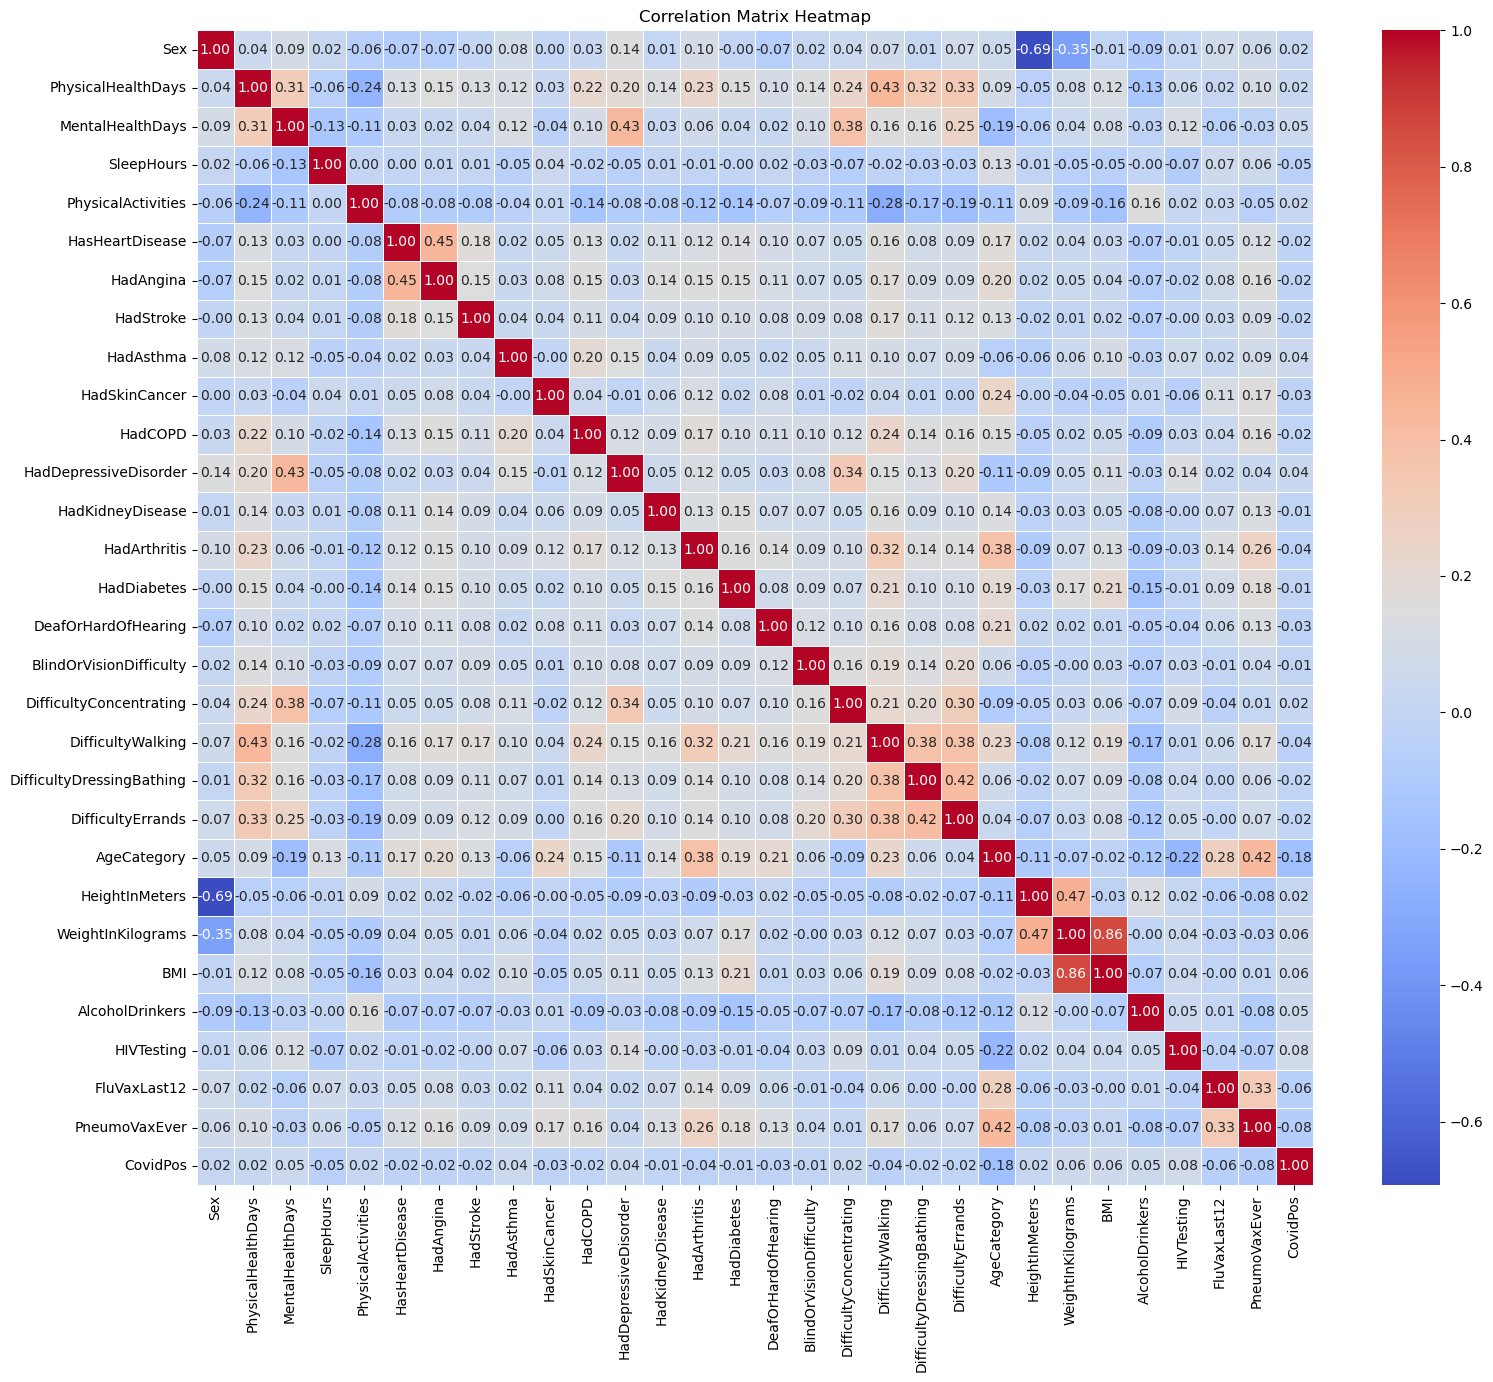

In [27]:
# Using a correlation matrix to see which features relate the most to HasHeartDisease. I'll then revisit the clustering models.
# This dataset has many features and we want to see which ones contribute the most to a 'Yes' in 'HasHeartDisease'. I need to use dimension reduction on the features, but I can't use PCA since the majority of the features are binary.
# I'll start with some general data analysis and then use MCA for dimension reduction.

selected_columns = ['Sex', 'PhysicalHealthDays', 'MentalHealthDays', 'SleepHours', 'PhysicalActivities', 'HasHeartDisease', 'HadAngina', 'HadStroke', 'HadAsthma', 'HadSkinCancer', 'HadCOPD', 'HadDepressiveDisorder', 'HadKidneyDisease', 'HadArthritis', 'HadDiabetes', 'DeafOrHardOfHearing', 'BlindOrVisionDifficulty', 'DifficultyConcentrating', 'DifficultyWalking', 'DifficultyDressingBathing', 'DifficultyErrands', 'AgeCategory', 'HeightInMeters', 'WeightInKilograms', 'BMI', 'AlcoholDrinkers', 'HIVTesting', 'FluVaxLast12', 'PneumoVaxEver', 'CovidPos']
df_corr = df[selected_columns]

correlation_matrix = df_corr.corr()
plt.figure(figsize=(18, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

# Looks like HasHeartDisease has the greatest correlation to HadAngina, HadStroke, DifficultyWalking and AgeCategory (I mentally set the cutoff to 0.15). Angina makes sense because that is chest pain cause by reduced blood flow to the heart. 

### The big question

Answering our first question of which states have the highest heart disease is one of the most important question to be answered from this dataset. Determining the highest and lowest percentages of positive heart disease per state can give deeper insights into each state to allow the further mining of questions.

In [30]:
#create a new dataframe that holds state values and yes/no has heart disease
stateSelectCol = ['State', 'HasHeartDisease']

stateDF = df[stateSelectCol]

#created sum values for each state. Greatly reduce dataframe size
accPositiveHeartDisease = stateDF.groupby('State').sum()
totalSubjects = stateDF.groupby('State').size()

#create a new datafram with cumulative values for heart disease detection and the total subjects per state. 
#These values were used to create a percentage column of positiveHD/State
NewStateDF = accPositiveHeartDisease
NewStateDF['Total Subjects'] = totalSubjects

percentofHD = round(NewStateDF['HasHeartDisease']/NewStateDF['Total Subjects'] * 100, 2)

#add new column to read percentage of detection of HD in tested subjects
NewStateDF['%ofHeartDisease'] = percentofHD

print(NewStateDF)


lowestHD = NewStateDF['%ofHeartDisease'].nsmallest(5)
highestHD = NewStateDF['%ofHeartDisease'].nlargest(5)

Top5Bottom5 = pd.concat([lowestHD, highestHD])
print(Top5Bottom5)

                      HasHeartDisease  Total Subjects  %ofHeartDisease
State                                                                 
Alabama                           124            1902             6.52
Alaska                            165            3205             5.15
Arizona                           359            5462             6.57
Arkansas                          244            2940             8.30
California                        214            5096             4.20
Colorado                          210            5159             4.07
Connecticut                       230            5053             4.55
Delaware                          108            2155             5.01
District of Columbia               59            1725             3.42
Florida                           557            7315             7.61
Georgia                           276            4978             5.54
Guam                               79            1549             5.10
Hawaii

I initially chose K-Means as a model. However, you can see below that that quickly uncovered other issues I needed to address. I applied K-Means using the HadAngina, HadStroke and AgeCategory features based on the correlation matrix results, but after reviewing the visual I realized that using binary/categorical features for K-Means doesn't really work without dimension reduction - it just generates a plot with a bunch of straight lines.  
I attempted to use PCA for dimension reduction, but then quickly remembered that PCA doesn't work for binary/categorical data. Thus began the long trek of learning about Multiple Correspondence Analysis (MCA), which is a type of dimension reduction/characteristic comparison for binary/categorical data. 
The main purpose of MCA is to display the relationship between categorical features. To apply MCA, I first had to create a contingency table to show the numeric relationship between features. Then I planned on plotting the MCA results to visualize their relationships.  
The downside of CA/MCA is that there isn't a ton of guidance on how to use it with Python. I had to use the Prince library which does have documentation, but it's not extensive. This may be because CA/MCA is largely used with R, but I'm not sure. 

In [31]:
# After running this I realized that I needed another type of dimensionality reduction before applying K-Means. Even if I use PCA and then apply K-Means, it just creates a plot of lines that isn't helpful.
# k means just using HadAngina, HadStroke and AgeCategory

selected_columns = ['HadAngina', 'HadStroke', 'AgeCategory']
df_v1 = df[selected_columns]

scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_v1)

pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

kmeans = KMeans(n_clusters=3, random_state=42) 
kmeans.fit(scaled_data)
clusters = kmeans.predict(scaled_data)

df_v1['Cluster'] = clusters

cluster_counts = df_v1['Cluster'].value_counts()
print("Number of data points in each cluster:")
print(cluster_counts)

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df['HadAngina'], df['HadStroke'], df['AgeCategory'], c=clusters, cmap='viridis', s=50)

ax.set_title('K-Means Clustering')
ax.set_xlabel('HadAngina')
ax.set_ylabel('HadStroke')
ax.set_zlabel('AgeCategory')

plt.show()

AttributeError: 'NoneType' object has no attribute 'split'

In [ ]:
# Contingency Table for MCA prep

# creating a new dataframe that only includes HasHeartDisease, HadStroke and AgeCategory
mca_df = df[['HasHeartDisease', 'HadStroke', 'AgeCategory']]

# displaying a contingency table to view the record counts based on the features
contingency_table = pd.crosstab(index=mca_df['HasHeartDisease'], columns=[mca_df['HadStroke'], mca_df['AgeCategory']], )
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 200)
print(contingency_table)


HadStroke            0                                                                                       1                                                             
AgeCategory         21     27     32     37     42     47     52     57     62     67     72     77     82  21  27  32   37   42   47   52   57   62    67    72   77    82
HasHeartDisease                                                                                                                                                            
0                13028  11010  13167  15307  16528  16044  18707  20444  24179  25282  22098  15072  14127  44  52  89  151  217  289  503  668  966  1120  1233  999  1263
1                   43     38     74    127    191    334    579    908   1282   1768   1979   1670   1924   7   9  16   29   37   86  124  204  293   387   429  395   502


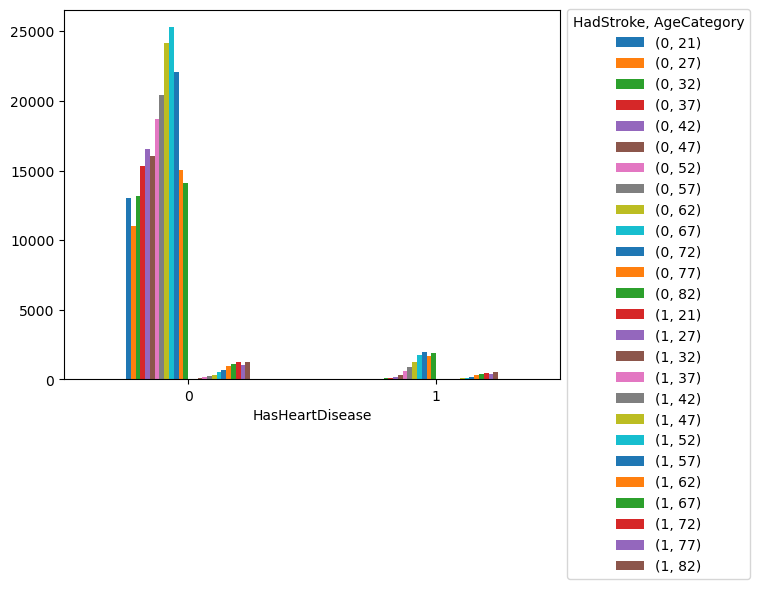

In [ ]:
# Plotting the contingency table first to get a visual of it.
# Based on the plot visual, if someone hasn't had a stroke, they aren't likely to have heart disease.
# Also, if they do have heart disease, they still aren't greatly likely to have had a stroke.

a = contingency_table.plot(kind='bar', rot=0)
a.legend(title='HadStroke, AgeCategory', bbox_to_anchor=(1, 1.02), 
         loc='upper left')


In [ ]:
# one-hot encoding the AgeCategory column to see if this fixes my problems
df_encoded = pd.get_dummies(mca_df, columns=['AgeCategory'])
print(df_encoded)

        HasHeartDisease  HadStroke  AgeCategory_21  AgeCategory_27  AgeCategory_32  AgeCategory_37  AgeCategory_42  AgeCategory_47  AgeCategory_52  AgeCategory_57  AgeCategory_62  AgeCategory_67  \
0                     0          0               0               0               0               0               0               0               0               0               0               1   
1                     0          0               0               0               0               0               0               0               0               0               0               0   
2                     0          0               0               0               0               0               0               0               0               0               0               0   
3                     0          0               0               0               0               0               0               0               0               0               0               0   
4         

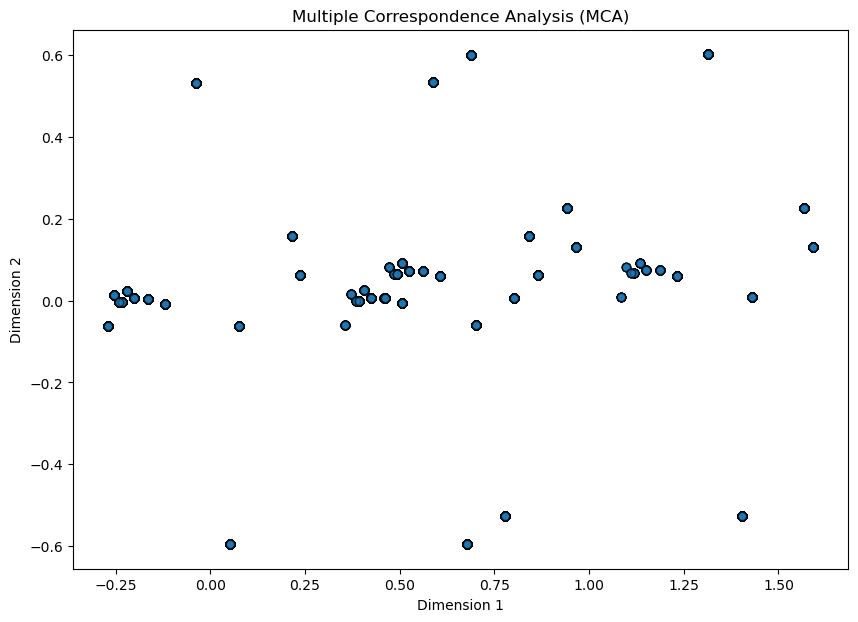

In [ ]:
# MCA
# using the Prince library to assist with this
# https://maxhalford.github.io/prince/mca/ 
import pandas as pd
import prince

mca = prince.MCA(
    n_components=2,
    n_iter=3,        
    copy=True,       
    check_input=True,
    engine='sklearn',   
    random_state=42  
)
mca.fit(df_encoded)

mca_coordinates = mca.row_coordinates(df_encoded)

plt.figure(figsize=(10, 7))
plt.scatter(mca_coordinates[0], mca_coordinates[1], alpha=0.5, edgecolor='k')
plt.title('Multiple Correspondence Analysis (MCA)')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.show()

# Although this plot is nice, it's difficult to interpret or gain any real knowledge.

The overall result from my analysis is that AgeCategory does seem to have an effort on whether someone has heart disease and if they have had a stroke. I would have liked to use the MCA plot to draw conclusions, but since I couldn't get it to plot correctly I can't summarize any real findings from it.  
Although it wasn't the exact goal of my project, overall the greatest thing I learned from this project is that clustering and dimension reduction is a different process and set of skills for binary/categorical data as opposed to continuous/numerical data. You can't tell from my final notebook, but I went through numerous iterations of the MCA/CA and plot implementations to try and get it to create a plot that could be interpreted for meaningful results. It seems like the issue comes from my data being binary and categorical (AgeCategory), but even after one-hot encoding the AgeCategory feature it still didn't work. I'll need to do more troubleshooting and research to see where the problem lies.  I will probably use this dataset again for Project 3 to see if I can make more progress and/or find a better way to model with binary features. 

Bayesian Network Model

A Bayesian network is a statistical model that represents a set of variables and their conditional dependencies using a directed acyclic graph. It's particularly useful for analyzing complex relationships and making predictions based on uncertain information. In this scenario the model is useful for analyzing complex relationships, helping to identify which factors or symptoms are most strongly associated with the presence of Heart Disease by modeling the dependencies between different variables. 

In [ ]:
from pgmpy.models import BayesianNetwork
from pgmpy.estimators import MaximumLikelihoodEstimator
# Using the main categories observed previously

structure = [
    ('HadAngina', 'HasHeartDisease'),
    ('HadAngina', 'DifficultyWalking'),
    ('HadAngina', 'AgeCategory'),
    ('DifficultyWalking', 'PhysicalHealthDays'),
    ('DifficultyWalking', 'HadDiabetes'),
    ('DifficultyWalking', 'HadCOPD'),
    ('PhysicalActivities', 'DifficultyWalking'),
    ('PhysicalActivities', 'BMI')
]



# Initialize the Bayesian model
bayesian_model = BayesianNetwork(structure)

# Train the model using Maximum Likelihood Estimation
bayesian_model.fit(df)


These values represent conditional probability distributions (CPDs) in a Bayesian network model. In a Bayesian network, each node represents a random variable, and the CPD associated with each node describes the conditional probability of that variable given its parent nodes.

In [ ]:
#printing the values for the CPD
cpds = bayesian_model.get_cpds()

for cpd in cpds:
    print("CPD for variable:", cpd.variable)
    print("Parents:", cpd.variables)
    print("Values:")
    print(cpd.values)
    print()


Direct Graph

Using the data provided by Bayesian model is possible to see what attributes are strongly correlated with HasHeartDisease. In this scenario, HadAngina being the main attribute followed by AgeCategory and DifficultyWalking

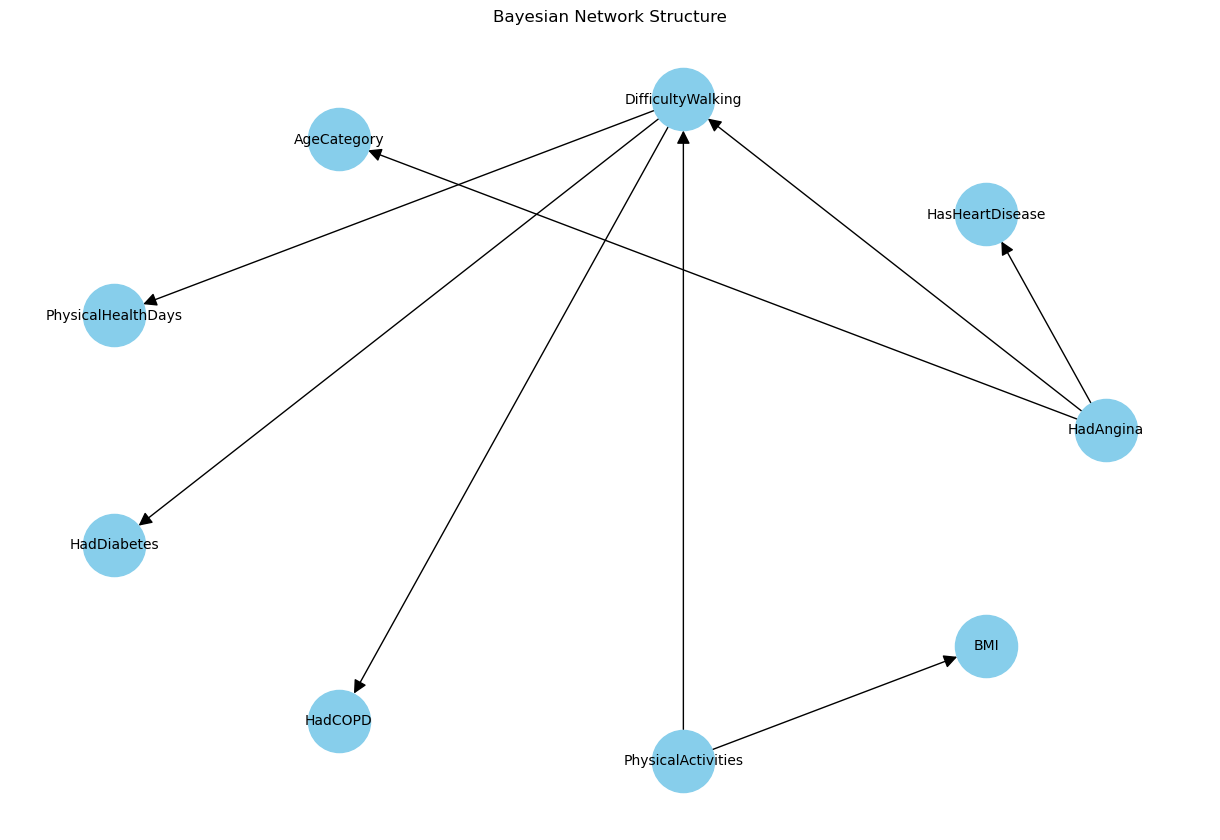

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
from pgmpy.models import BayesianNetwork

# Using the already defined and trained Bayesian model
bayesian_model = BayesianNetwork(structure)
bayesian_model.fit(df)

# Create an empty directed graph
G = nx.DiGraph()

# Add nodes from the model
G.add_nodes_from(bayesian_model.nodes())

# Add edges and their attributes from the model
for edge in bayesian_model.edges():
    G.add_edge(edge[0], edge[1], weight=1)  # Add an attribute 'weight'

# Plot the graph
plt.figure(figsize=(12, 8))  # Increase figure size
pos = nx.circular_layout(G)  # Use circular layout algorithm
nx.draw(G, pos, with_labels=True, node_size=2000, node_color="skyblue", font_size=10, arrowsize=20)
plt.title("Bayesian Network Structure")
plt.show()



Bayesyan Model Plots using the main attributes identified


In [ ]:
from pgmpy.models import BayesianNetwork
from pgmpy.estimators import MaximumLikelihoodEstimator
#FILTERING ONLY THE MAIN ATTRIBUTES
# Define the Bayesian network structure with the specified conditions
structure = [
    ('HadAngina', 'HasHeartDisease'),
    ('HadAngina', 'DifficultyWalking'),
    ('HadAngina', 'AgeCategory'),
]

# Initialize the Bayesian model
bayesian_model = BayesianNetwork(structure)

# Train the model using Maximum Likelihood Estimation
bayesian_model.fit(df)

# Print the learned parameters (conditional probability distributions)
for cpd in bayesian_model.get_cpds():
    print(cpd)


The data presented above demonstrates an increase in the attribute "HasAngina" corresponding to the rise in age categories. This is also highlighted in the bar graph bellow. Therefore, the further heat maps the in the project it was used the age category filtered to 50+ years old.

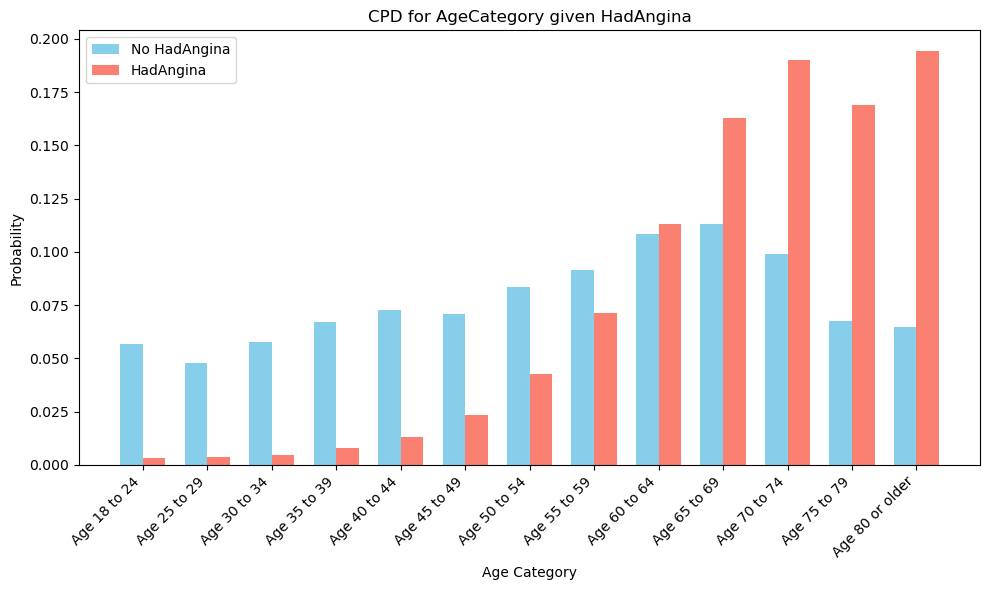

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the CPD values for AgeCategory given HadAngina
values = np.array([[0.05657617, 0.00327693],
                   [0.04782987, 0.00381194],
                   [0.05744604, 0.00481509],
                   [0.06705356, 0.00802515],
                   [0.072619, 0.01290711],
                   [0.07099178, 0.0233398],
                   [0.08342097, 0.04260015],
                   [0.0915614, 0.07135692],
                   [0.10830964, 0.11322143],
                   [0.11303117, 0.16311108],
                   [0.09907863, 0.19026282],
                   [0.06755558, 0.16892931],
                   [0.06452618, 0.19434227]])
 
# Plotting the CPD
plt.figure(figsize=(10, 6))
x_labels = ['Age 18 to 24', 'Age 25 to 29', 'Age 30 to 34', 'Age 35 to 39',
            'Age 40 to 44', 'Age 45 to 49', 'Age 50 to 54', 'Age 55 to 59',
            'Age 60 to 64', 'Age 65 to 69', 'Age 70 to 74', 'Age 75 to 79',
            'Age 80 or older']
bar_width = 0.35
index = np.arange(len(x_labels))
plt.bar(index - bar_width/2, values[:, 0], bar_width, label='No HadAngina', color='skyblue')
plt.bar(index + bar_width/2, values[:, 1], bar_width, label='HadAngina', color='salmon')
plt.xlabel('Age Category')
plt.ylabel('Probability')
plt.title('CPD for AgeCategory given HadAngina')
plt.xticks(index, x_labels, rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()


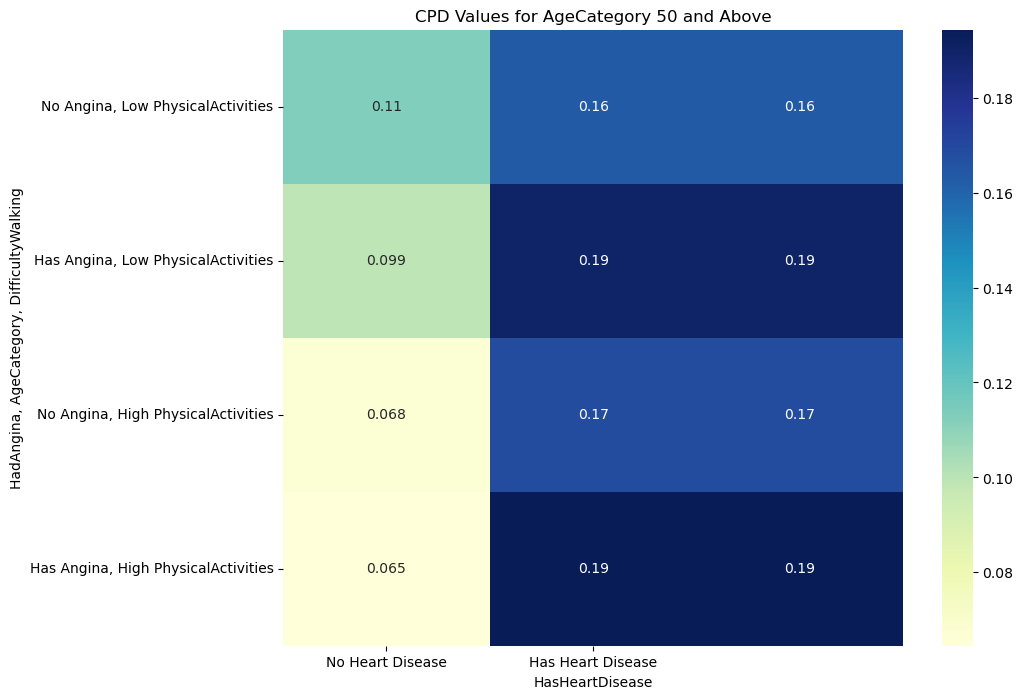

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# CPD values for the combination of the attributes provided by the Bayesian Model
cpd_values = np.array([[0.113031, 0.163111, 0.163111],
                       [0.099079, 0.190263, 0.190263],
                       [0.067556, 0.168929, 0.168929],
                       [0.064526, 0.194342, 0.194342]])

# Define the combination labels for rows and columns
row_labels = ['No Angina, Low PhysicalActivities', 'Has Angina, Low PhysicalActivities',
              'No Angina, High PhysicalActivities', 'Has Angina, High PhysicalActivities']
column_labels = ['No Heart Disease', 'Has Heart Disease']

# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cpd_values, annot=True, cmap="YlGnBu", xticklabels=column_labels, yticklabels=row_labels, cbar=True)
plt.xlabel('HasHeartDisease')
plt.ylabel('HadAngina, AgeCategory, DifficultyWalking')
plt.title('CPD Values for AgeCategory 50 and Above')
plt.show()


Above; The numbers inside each cell of the heatmap represent the conditional probabilities of HasHeartDisease given the state of HadAngina. 

Top-Left Cell: Represents the probability of not having heart disease (HasHeartDisease = No Angina) given not having angina (HadAngina = No Angina).
Top-Right Cell: Represents the probability of not having heart disease (HasHeartDisease = No Angina) given having angina (HadAngina = Has Angina).
Bottom-Left Cell: Represents the probability of having heart disease (HasHeartDisease = Has Angina) given not having angina (HadAngina = No Angina).
Bottom-Right Cell: Represents the probability of having heart disease (HasHeartDisease = Has Angina) given having angina (HadAngina = Has Angina).

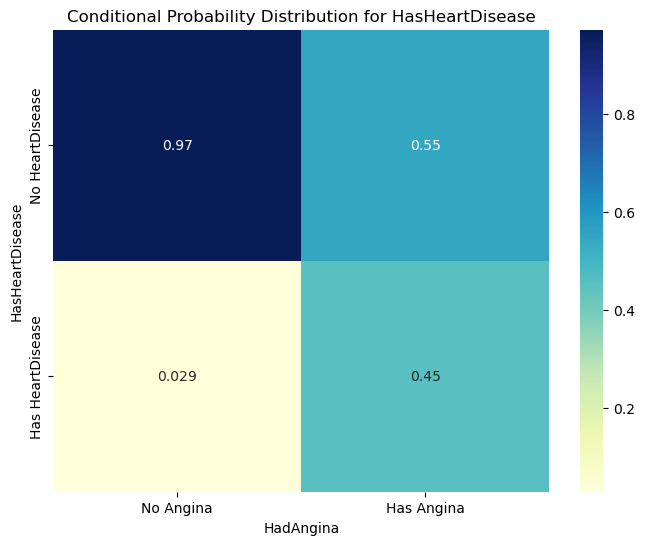

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#CPD values for the attributes bellow
values = np.array([[0.97116446, 0.54711429],
                   [0.02883554, 0.45288571]])

# Define the states of the parents
states = ['No Angina', 'Has Angina']
states2 = ['No HeartDisease', 'Has HeartDisease']

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(values, annot=True, cmap="YlGnBu", xticklabels=states, yticklabels=states2, cbar=True)
plt.xlabel('HadAngina')
plt.ylabel('HasHeartDisease')
plt.title('Conditional Probability Distribution for HasHeartDisease')
plt.show()


In the map above, it is evident that the presence of 'HasAngina' is strongly associated with 'HasHeartDisease', with a relatively high probability of 0.45. This probability falls within the range of 0 to 1, where values closer to 1 indicate a higher likelihood of occurrence.

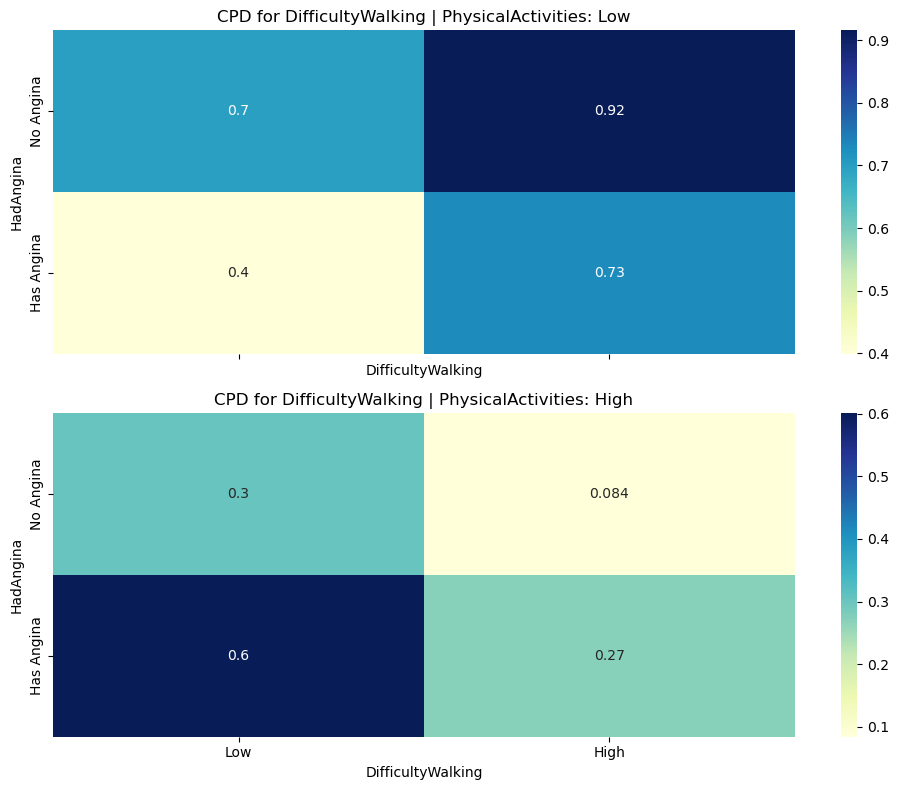

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#CPD values for the attributes bellow
values = np.array([[[0.69680916, 0.91573383],
                    [0.39961905, 0.72998042]],
                   [[0.30319084, 0.08426617],
                    [0.60038095, 0.27001958]]])

# Define the states of the parents
states = ['No Angina, Low PhysicalActivities', 'No Angina, High PhysicalActivities',
          'Has Angina, Low PhysicalActivities', 'Has Angina, High PhysicalActivities']

# Create subplots for each combination of parent states
fig, axes = plt.subplots(2, 1, figsize=(10, 8), sharex=True, sharey=True)

for i in range(2):
    sns.heatmap(values[i], annot=True, cmap="YlGnBu", xticklabels=['Low', 'High'], yticklabels=['No Angina', 'Has Angina'], cbar=True, ax=axes[i])
    axes[i].set_title(f'CPD for DifficultyWalking | PhysicalActivities: {["Low", "High"][i]}')
    axes[i].set_xlabel('DifficultyWalking')
    axes[i].set_ylabel('HadAngina')

plt.tight_layout()
plt.show()


The heat map above clearly illustrates the significant impact of Physical Activities on Difficulty Walking and, consequently, its closely correlated attribute, HasAngina. This impact is particularly evident in the range of values associated with these attributes: from 0.27 when physical activity is high to 0.73 when physical activity is low.

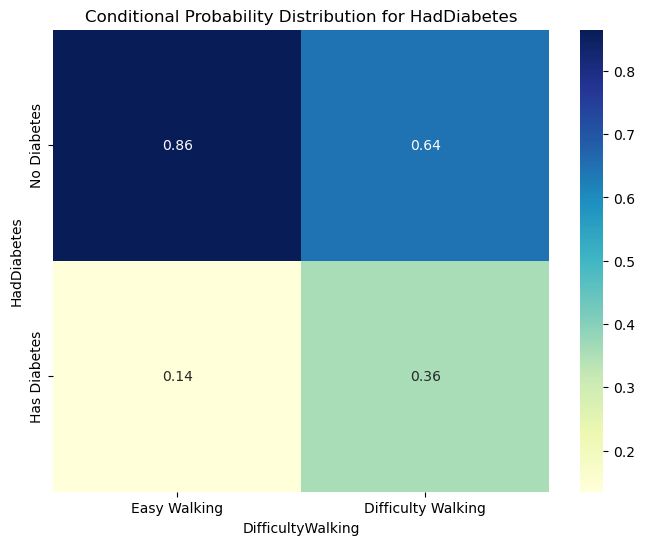

In [ ]:
# Not important plot as Diabetes is a week correlated attribute

# CPD values using diabetes
values = np.array([[0.86497866, 0.64402551],
                   [0.13502134, 0.35597449]])

# Define the states of the parents
states = ['No Diabetes', 'Has Diabetes']

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(values, annot=True, cmap="YlGnBu", xticklabels=['Easy Walking', 'Difficulty Walking'], yticklabels=states, cbar=True)
plt.xlabel('DifficultyWalking')
plt.ylabel('HadDiabetes')
plt.title('Conditional Probability Distribution for HadDiabetes')
plt.show()


Above it can be observed that the probability associated with 'HasDiabetes' (0.36) is not notably high. This suggests that 'HasDiabetes' is not directly correlated with 'HasHeartDisease' or its strongly correlated attribute, 'HasAngina'.